## Reference

[1] [超簡單台股每日爬蟲教學](https://www.finlab.tw/%E8%B6%85%E7%B0%A1%E5%96%AE%E5%8F%B0%E8%82%A1%E6%AF%8F%E6%97%A5%E7%88%AC%E8%9F%B2%E6%95%99%E5%AD%B8/)

***


# 用Pandas來計算常見技術指標 - RSI


In [4]:
# loading library and dataset
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

db = sqlite3.connect('TWStock_2')
tsmc = pd.read_sql(con=db,sql='SELECT * FROM "2330"')

In [5]:
### Clearning data

# 成交股數、開盤價、最高價、最低價、收盤價的資料
# 用 Date 當作索引值

tsmc.index = pd.to_datetime(tsmc['Date'])
tsmc = tsmc[['成交股數','開盤價','最高價','最低價','收盤價']]
tsmc.columns = ['Volume','Open','High','Low','Close']
tsmc['Close'] = pd.to_numeric(tsmc['Close'])

## RSI

 - 根據維基百科: 相對強弱指數（Relative Strength Index，RSI)
 
 
 - 比較價格升降運動以表達價格強度的技術分析工具。


 - 設每天向上變動為 U，向下變動為 D。


 - 在價格上升的日子: U = 當日收盤價 - 昨日收盤價, D = 0


 - 在價格下跌的日子: U = 0 , D = 昨日收盤價 - 當日收盤價 


 - 有了 U 和 D 的值之後，我們需要計算 U 以及 D 的平均值


 - 這邊的平均值是使用 n 天的指數移動平均 (EMA)


 - 計算出相對強度

$$RS = \frac{EMA(U,n)}{EMA(D,n)}$$

 - 有了相對強度，我們就可以計算出 RSI

$$RSI = (1 - \frac{1}{1+RS}) \times 100\%$$


 - 根據威爾德（英語：J. Welles Wilder）的測量結果，當 n = 14 時，指數最具代表性。


 - 當某證券的 **RSI升至70** 時，代表該證券已**被超買（Overbought）**，投資者應考慮**出售該證券**。
 
 
 - 當某證券的 **RSI跌至30** 時，代表該證券已**被超賣（Oversold**，投資者應**購入該證券**。

In [6]:
tsmc['Dif'] = tsmc['Close'].diff()

In [7]:

def cal_U(num):
    if num >= 0:
        return num
    else:
        return 0
def cal_D(num):
    num = -num
    return cal_U(num)


tsmc['U'] = tsmc['Dif'].apply(cal_U)
tsmc['D'] = tsmc['Dif'].apply(cal_D)
tsmc['ema_U'] = tsmc['U'].ewm(span = 14).mean()
tsmc['ema_D'] = tsmc['D'].ewm(span = 14).mean()
tsmc['RS'] = tsmc['ema_U'].div(tsmc['ema_D'])
tsmc['RSI'] = tsmc['RS'].apply(lambda rs:rs/(1+rs) * 100)

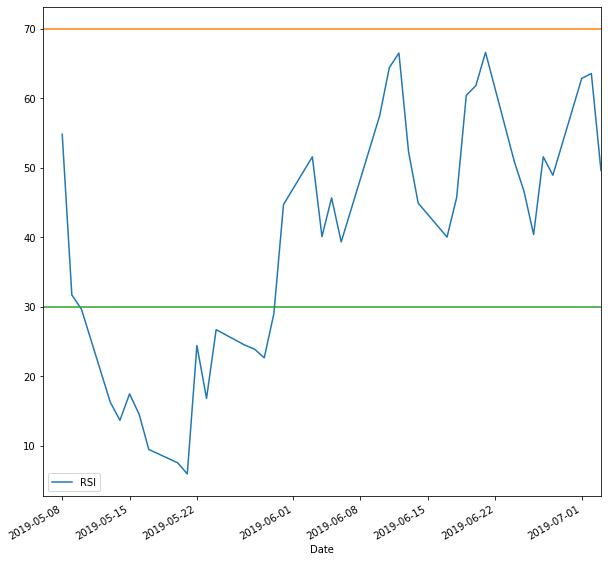

In [8]:
# Graphing

plt.figure(figsize=(10,10))
tsmc['RSI'].plot()
plt.plot(tsmc.index,[70]*len(tsmc.index))
plt.plot(tsmc.index,[30]*len(tsmc.index))
plt.legend()
plt.show()